# Modeling with the best dataset

##### Imports I

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

#### Unpickle the `data_for_models` variable

In [2]:
%store -r data_for_models

In [3]:
data_for_models.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11173 entries, 0 to 11192
Columns: 346 entries, year to months_11
dtypes: float64(14), int64(2), uint8(330)
memory usage: 5.0 MB


In [4]:
len(data_for_models.columns)

346

In [5]:
data_for_models.head()

,year,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,...,months_2,months_3,months_4,months_5,months_6,months_7,months_8,months_9,months_10,months_11
0,2016,11956.0,507.33,39.83,452.65,4.72,529.47,201.0,9.0,106950.0,...,0,0,0,0,0,0,0,0,0,0
1,2016,588.0,34.71,4.71,19.77,0.32,38.49,13.0,2.0,5170.0,...,0,0,0,0,0,0,0,0,0,0
2,2016,607.0,35.52,5.40,23.55,0.00,27.52,12.0,2.0,4485.0,...,0,0,0,0,0,0,0,0,0,0
3,2016,1595.0,117.00,10.26,117.66,0.83,89.25,137.0,6.0,23698.0,...,0,0,0,0,0,0,0,0,0,0
4,2016,327.0,23.67,1.47,14.50,0.06,19.29,0.0,0.0,2276.0,...,0,0,0,0,0,0,0,0,0,0


## Finish Preprocessing to work with Supervised Machine Learning Classification Models

##### Imports II

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
len(data_for_models.columns)

346

In [8]:
X = data_for_models.drop('target', axis=1)

In [9]:
len(X.columns)

345

In [10]:
y = data_for_models['target']

We are about to use stats odels for the logistic regression, which requires that we manually add an intercept equal to 1.0

In [11]:
# manually add the intercept, since this is stats models
X['intercept'] = 1.0

## Train Test Split
first split is at 33%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Logistic Regression
the most obvious classfier is Logistic Regression, so we will start with that ans see what results we get

##### Imports III

In [13]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

/Users/jg/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
# finish with 
# coef_ , intercept_ , and n_iter_ 

In [15]:
# too many errors with this code

# # begin with the Stats Models API for some basic logistic regression stats
# logit_model = sm.Logit(y_train, X_train.astype(float), method='bfgs')
# result = logit_model.fit()
# print ( result.summary() )

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predictions = log_reg.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
score = log_reg.score(X_test, y_test)
print(score)

0.983459869848


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [20]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1484   26]
 [  35 2143]]


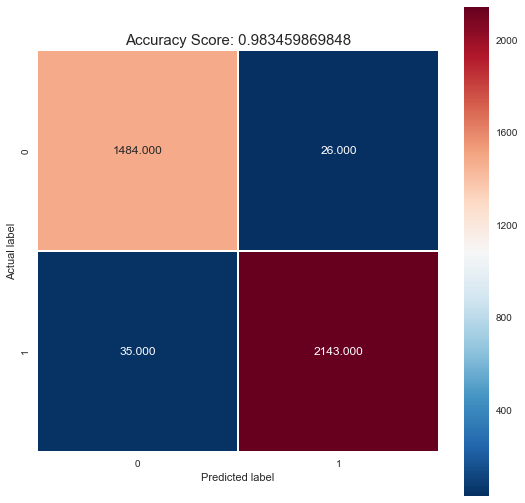

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdBu_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [22]:
1493 + 2153 + 25 + 17

3688

Try a different split sample size

This one is at 66%

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.66, random_state=42)

In [24]:
log_reg_66 = LogisticRegression()
log_reg_66.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
predictions_66 = log_reg_66.predict(X_test)
predictions_66

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
score_66 = log_reg_66.score(X_test, y_test)
print(score_66)

0.987796610169


In [27]:
cm_66 = metrics.confusion_matrix(y_test, predictions_66)
print(cm_66)

[[2967   40]
 [  50 4318]]


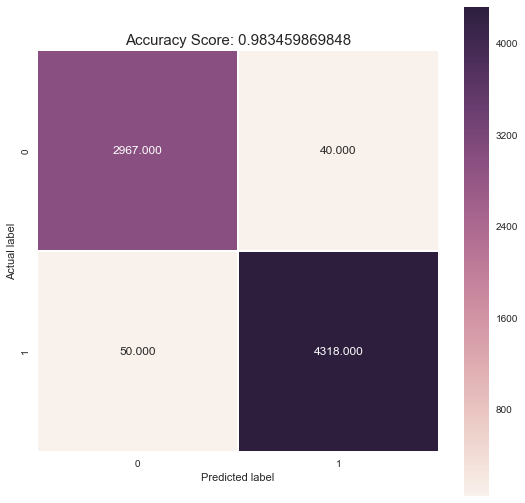

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(cm_66, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [29]:
2967 + 4318 + 50 + 40

7375